## Missing values and duplicates

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('../data/training.csv')
df_test = pd.read_csv('../data/test.csv')

### Missing values

In [3]:
df_train.isna().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

There are a lot of missing values in the data, especially in more sophisticated features. We can impute them using other models, or just ignore the value of loss function for them. Since all the missing values appear in target variables, for now we will not impute them, and rather just omit calculating loss for these observations.

## Duplicates

In [4]:
df_train[df_train.duplicated(subset="Image", keep=False)].head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
1906,63.749207,36.221939,28.384546,39.022015,56.949211,37.972917,70.765705,36.239131,35.453863,39.606916,...,57.014921,64.760120,72.939445,34.426676,74.638118,50.297134,73.254912,50.564068,73.934382,5 10 20 29 39 48 61 73 94 112 120 123 127 124 ...
1907,22.763345,55.617202,1.528527,56.404973,19.064954,56.291237,27.571879,56.384378,5.751046,56.743904,...,60.069687,22.923362,73.483945,2.245766,74.128316,12.605173,71.888816,12.536477,76.628863,5 10 20 29 39 48 61 73 94 112 120 123 127 124 ...
2294,68.147669,36.542446,32.530286,40.170137,NaN,NaN,NaN,NaN,NaN,NaN,...,67.213029,NaN,NaN,NaN,NaN,NaN,NaN,54.296469,79.085486,137 136 135 134 132 128 123 121 121 128 106 70...
2297,69.275782,35.639229,28.891200,38.888567,NaN,NaN,NaN,NaN,NaN,NaN,...,64.883287,NaN,NaN,NaN,NaN,NaN,NaN,51.172364,74.631302,56 57 57 56 54 51 50 53 55 56 55 54 55 65 75 8...
2298,63.366646,41.137231,34.119385,38.170092,NaN,NaN,NaN,NaN,NaN,NaN,...,58.939815,NaN,NaN,NaN,NaN,NaN,NaN,46.835692,70.808123,13 13 11 10 9 8 7 8 8 8 9 9 11 12 15 18 20 24 ...


In [5]:
df_train_duplicates_list = [grouped for row, grouped in df_train.groupby("Image") if len(grouped) > 1]
df_train_duplicates = pd.concat(df_train_duplicates_list)

In [6]:
df_train_duplicates.notna().sum().sort_values(ascending=False)

left_eye_center_x            1098
left_eye_center_y            1098
mouth_center_bottom_lip_y    1098
mouth_center_bottom_lip_x    1098
nose_tip_y                   1098
nose_tip_x                   1098
Image                        1098
right_eye_center_x           1098
right_eye_center_y           1098
left_eye_outer_corner_y         2
right_eye_inner_corner_x        2
mouth_center_top_lip_y          2
mouth_center_top_lip_x          2
mouth_right_corner_y            2
mouth_right_corner_x            2
mouth_left_corner_y             2
mouth_left_corner_x             2
left_eye_inner_corner_x         2
left_eye_inner_corner_y         2
left_eyebrow_outer_end_y        2
right_eyebrow_inner_end_y       2
right_eyebrow_inner_end_x       2
left_eye_outer_corner_x         2
left_eyebrow_outer_end_x        2
left_eyebrow_inner_end_y        2
left_eyebrow_inner_end_x        2
right_eye_inner_corner_y        2
right_eyebrow_outer_end_x       1
right_eye_outer_corner_y        1
right_eye_oute

Most of the duplicated values come from basic features.

In [7]:
from typing import List, Tuple
def get_image_and_keypoints(series: pd.Series) -> Tuple[np.array, pd.DataFrame]:
    image = series['Image']
    image = np.fromstring(image, sep=' ').reshape([96, 96]) / 255.0
    keypoints = pd.DataFrame(series).drop(['Image'], axis=0).values.reshape([15, 2])
    return image, keypoints


def get_image_and_keypoints_by_id(train_data: pd.DataFrame, id: int):
    series = train_data.iloc[id]
    return get_image_and_keypoints(series)


def show_image_with_keypoints(series: np.array):
    image, keypoints = get_image_and_keypoints(series)
    plt.imshow(image, cmap='gray')
    plt.plot(keypoints[:, 0], keypoints[:, 1], 'gx')


def show_image_with_keypoints_by_id(train_data, id):
    series = train_data.iloc[id]
    show_image_with_keypoints(series)
    
def visualize_duplicates(df_duplicates: pd.DataFrame,  n_pictures: int = 5):
    n_rows = len(df_duplicates)
    fig = plt.figure(figsize=(5, 5*n_rows))
    i = 1
    for index, row in df_duplicates.iterrows():        
        image, keypoints = get_image_and_keypoints(row)
        fig.add_subplot(1, n_rows, i)
        plt.imshow(image, cmap='gray')
        plt.plot(keypoints[:,0], keypoints[:,1], 'gx')
        plt.axis("off")
        i+=1 
    plt.show()

Let's visualize the duplicates and decide what to do with them.

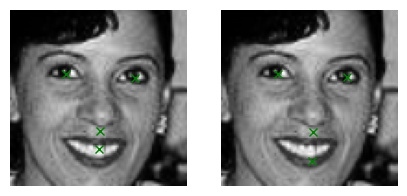

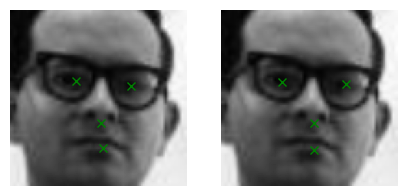

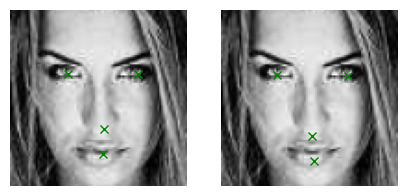

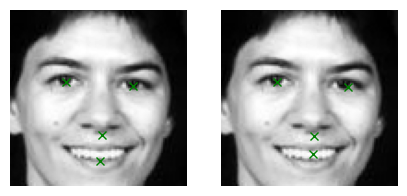

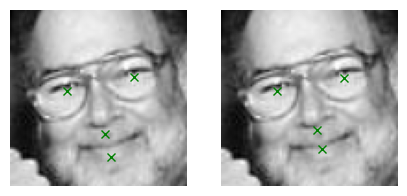

In [8]:
for i in range(5):
    visualize_duplicates(df_train_duplicates_list[i])

There is no clear automatic way of picking better option. Thus, the best way would be to calculate some sort of aggregate for every feature. For lack of a better candidate, let's go with the mean value.

In [12]:
def transform_duplicates_to_mean_value(df: pd.DataFrame) -> pd.DataFrame:
    df_duplicates = pd.concat([grouped for row, grouped in df.groupby("Image") if len(grouped) > 1])
    df_duplicates_transformed = df_duplicates.groupby("Image").mean().reset_index()
    df_transformed = pd.concat([df.drop(index = df_duplicates.index.to_list()), df_duplicates_transformed])
    return df_transformed

In [15]:
df_train = transform_duplicates_to_mean_value(df_train)

In [18]:
df_train.duplicated().sum()

0